### Análisis de conglomerados
#### Análisis Kmeans
#### Autor:
#### Fecha:

## Cargar librerias

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Leer el archivo


In [2]:
data = pd.read_csv("customers_financial_data.csv")

In [3]:
data

,IDCliente,Income,Expense,Age,Products,Delay
0,1,8270,7568,67,2,0
1,2,1860,4650,31,8,0
2,3,6390,5395,19,4,0
3,4,6191,5373,26,8,0
4,5,6734,1981,54,7,1
...,...,...,...,...,...,...
995,996,6232,2425,67,4,0
996,997,6797,1119,50,8,1
997,998,5926,1774,44,9,0
998,999,7016,1456,24,3,0


##  Mostrar el encabezado de los datos - head()


In [4]:
data.head(4)

,IDCliente,Income,Expense,Age,Products,Delay
0,1,8270,7568,67,2,0
1,2,1860,4650,31,8,0
2,3,6390,5395,19,4,0
3,4,6191,5373,26,8,0


##  Mostrar los últimos registros de los datos - tail()

In [5]:
data.tail(3)

,IDCliente,Income,Expense,Age,Products,Delay
997,998,5926,1774,44,9,0
998,999,7016,1456,24,3,0
999,1000,4335,2439,23,7,1


##  Mostrar el tamaño del dataset -  shape


In [6]:
data.shape

(1000, 6)

##  Mostrar la información de cada variable - info()


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   IDCliente  1000 non-null   int64
 1   Income     1000 non-null   int64
 2   Expense    1000 non-null   int64
 3   Age        1000 non-null   int64
 4   Products   1000 non-null   int64
 5   Delay      1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


##  Mostrar la información estadística de cada variable - describe()


In [8]:
data.describe()

,IDCliente,Income,Expense,Age,Products,Delay
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5594.25600,4162.399000,43.253000,4.999000,0.309000
std,288.819436,2533.55383,2171.169283,14.946518,2.596101,0.462312
min,1.000000,1004.00000,501.000000,18.000000,1.000000,0.000000
25%,250.750000,3467.50000,2296.750000,31.000000,3.000000,0.000000
50%,500.500000,5750.00000,4116.500000,43.000000,5.000000,0.000000
75%,750.250000,7806.75000,5937.500000,56.000000,7.000000,1.000000
max,1000.000000,9996.00000,7991.000000,69.000000,9.000000,1.000000


##  Graficar la distribución de cada variable

In [9]:
columns_names = list(data.columns)
columns_names

['IDCliente', 'Income', 'Expense', 'Age', 'Products', 'Delay']

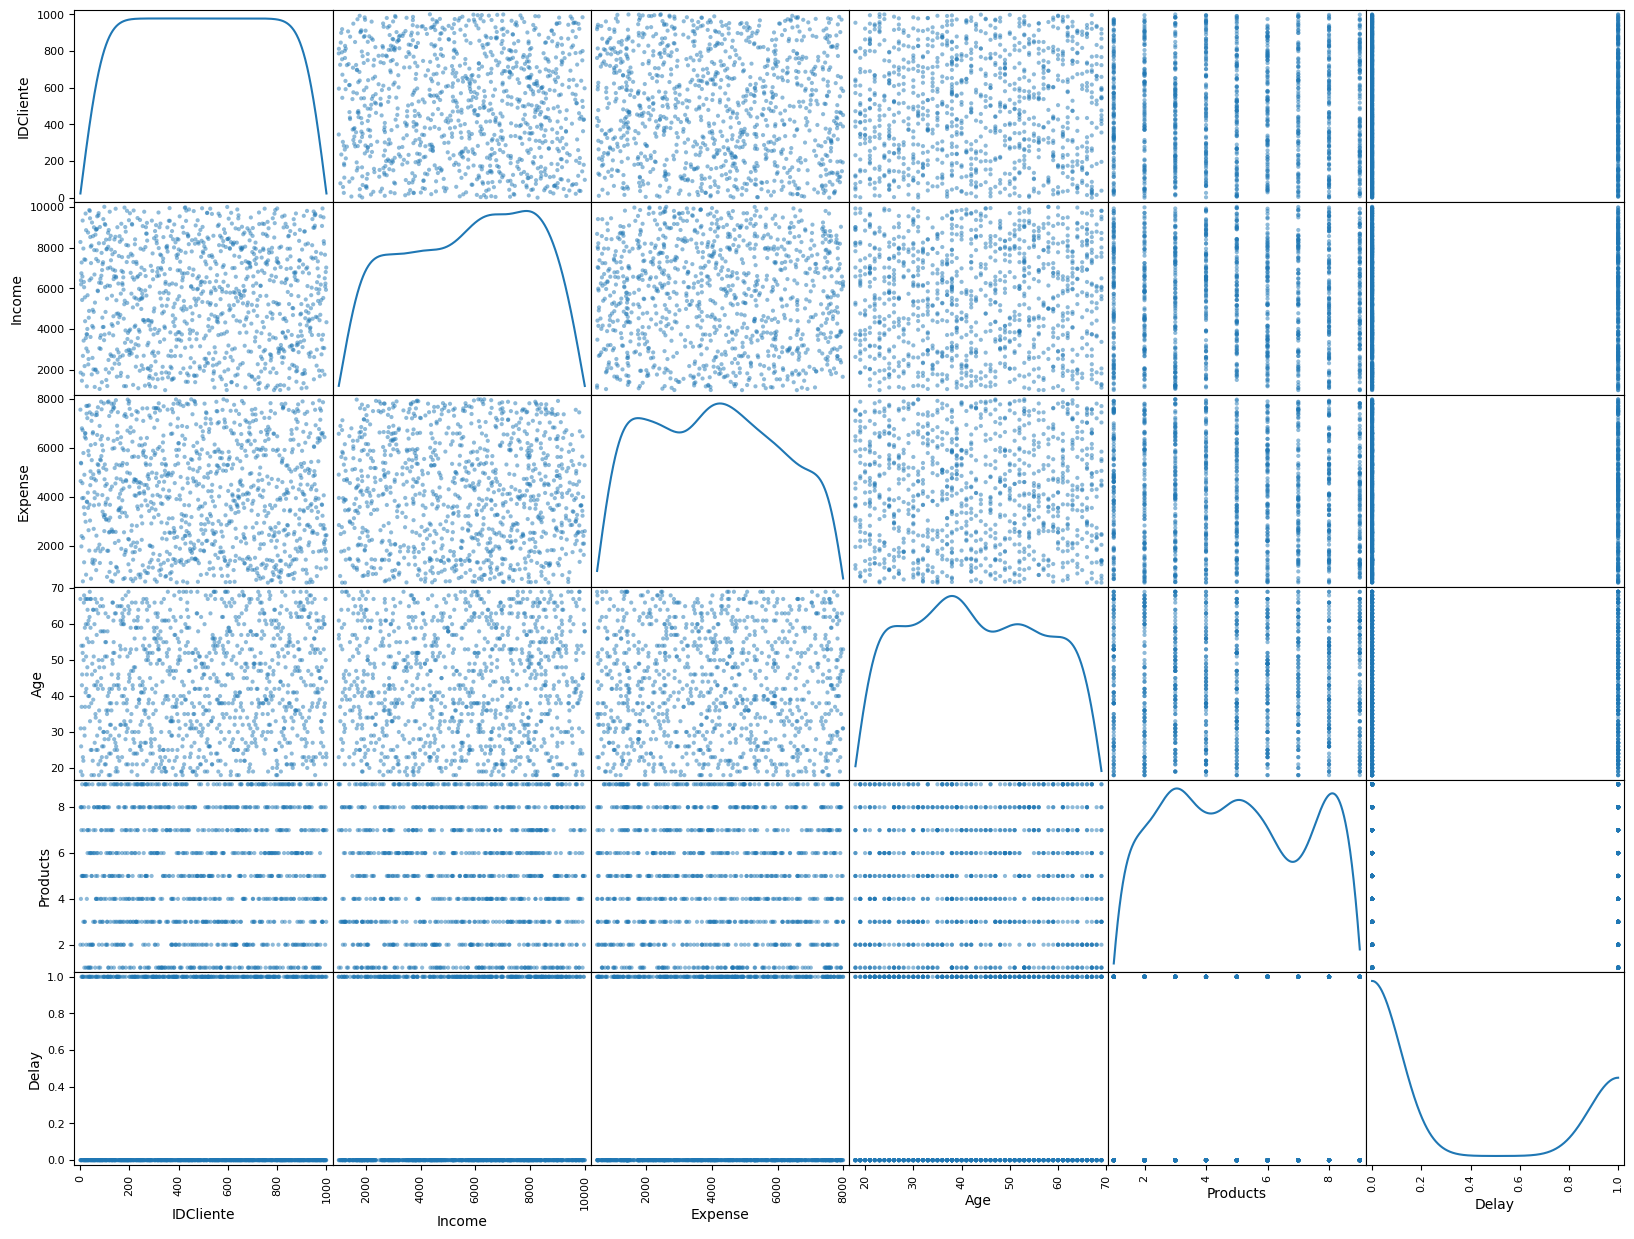

In [10]:
pd.plotting.scatter_matrix(data.loc[:,columns_names], diagonal="kde",figsize=(20,15))
plt.show()

##  Seleccionar las variables para agrupar

In [11]:
# Seleccionar las características relevantes
features = data[["Income", "Expense", "Age", "Products", "Delay"]]
features

,Income,Expense,Age,Products,Delay
0,8270,7568,67,2,0
1,1860,4650,31,8,0
2,6390,5395,19,4,0
3,6191,5373,26,8,0
4,6734,1981,54,7,1
...,...,...,...,...,...
995,6232,2425,67,4,0
996,6797,1119,50,8,1
997,5926,1774,44,9,0
998,7016,1456,24,3,0


## Normalizar los datos

In [14]:
# Normalizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


##  Generamos varias soluciones con kmeans

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)


In [16]:
wcss

[5000.000000000002,
 4240.246615222483,
 3472.1185388006766,
 3121.0231261088156,
 2885.728983910279,
 2646.4318282840254,
 2504.3046225780126,
 2274.3366621631812,
 2166.718696036915,
 2078.5448755121306]

Graficamos para seleccionar el numero de grupos ideales

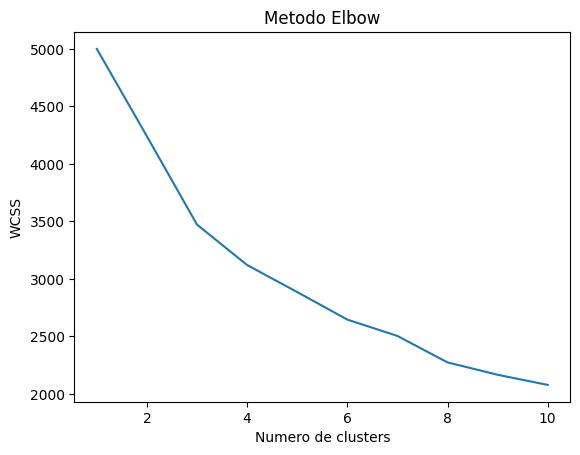

In [17]:
plt.plot(range(1, 11), wcss)
plt.title('Metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

### ¿Qué es inertia_?

En K-Means, inertia_ se refiere a la suma de las distancias cuadradas de cada punto de datos al centroide del clúster al que pertenece. Es una medida de la compacidad de los clústeres: cuanto menor sea la inercia, más cerca están los puntos de datos dentro de un clúster de su centroide.

### Interpretación de kmeans.inertia_

* 1. Compacidad de los Clústeres:

Valores más bajos de inertia_ indican que los puntos de datos están más cerca de sus centroides, lo que generalmente sugiere clústeres más compactos y, por lo tanto, una mejor agrupación.

* 2. Número de Clústeres:

A medida que aumenta el número de clústeres (n_clusters), la inercia tiende a disminuir porque los puntos de datos están agrupados en clústeres más pequeños y específicos. Sin embargo, una disminución continua no siempre significa una mejor agrupación en términos de interpretabilidad o generalización.

* 3. Método del Codo:

La inertia_ se utiliza a menudo en el método del codo para determinar el número óptimo de clústeres. Al graficar la inercia frente al número de clústeres, se busca un punto donde la tasa de disminución de la inercia se reduce significativamente (formando un "codo"). Este punto indica el número óptimo de clústeres.


##  Generamos los clusters

In [21]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(features_scaled)
data["Cluster"] = y_kmeans

In [22]:
y_kmeans

array([1, 2, 2, 2, 0, 3, 2, 0, 3, 0, 0, 3, 0, 2, 1, 3, 1, 0, 1, 2, 1, 1,
       2, 3, 0, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 3,
       0, 1, 2, 0, 3, 3, 2, 1, 0, 3, 3, 1, 1, 1, 2, 3, 0, 3, 2, 1, 0, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 3, 2, 3, 2, 3, 2, 2, 0, 2, 1, 2,
       1, 2, 1, 3, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 2, 1, 2, 3, 1, 3, 0,
       0, 0, 1, 0, 0, 3, 3, 2, 0, 1, 3, 3, 0, 0, 0, 1, 2, 3, 1, 3, 1, 3,
       1, 0, 2, 0, 2, 2, 1, 2, 1, 3, 1, 3, 1, 0, 0, 0, 3, 0, 0, 2, 0, 3,
       0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 3, 1,
       2, 0, 2, 1, 3, 3, 1, 3, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 0, 2, 0, 2, 3, 1, 3, 3, 0, 2, 0, 1, 0, 3, 0, 3, 3, 1, 0, 1, 0,
       2, 0, 0, 0, 3, 2, 0, 1, 1, 3, 0, 3, 1, 0, 1, 0, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 2, 1, 3, 0, 3, 2, 1, 0, 3, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 3, 0, 2, 3, 0, 2, 2, 3, 3, 2, 3, 2,
       3, 0, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 2, 0, 2,

In [23]:
data.head(5)

,IDCliente,Income,Expense,Age,Products,Delay,Cluster
0,1,8270,7568,67,2,0,1
1,2,1860,4650,31,8,0,2
2,3,6390,5395,19,4,0,2
3,4,6191,5373,26,8,0,2
4,5,6734,1981,54,7,1,0


##  Graficamos los grupos

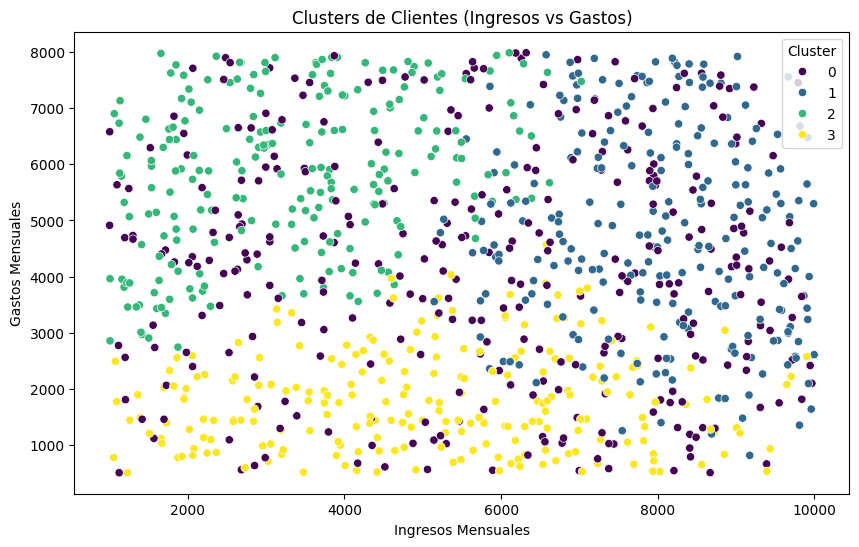

In [24]:
# Visualización de los clusters (usando Ingresos vs Gastos)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Income", y="Expense", hue="Cluster", palette="viridis")
plt.title("Clusters de Clientes (Ingresos vs Gastos)")
plt.xlabel("Ingresos Mensuales")
plt.ylabel("Gastos Mensuales")
plt.show()

## 1. Identificar grupos de clientes con altos ingresos y bajos gastos

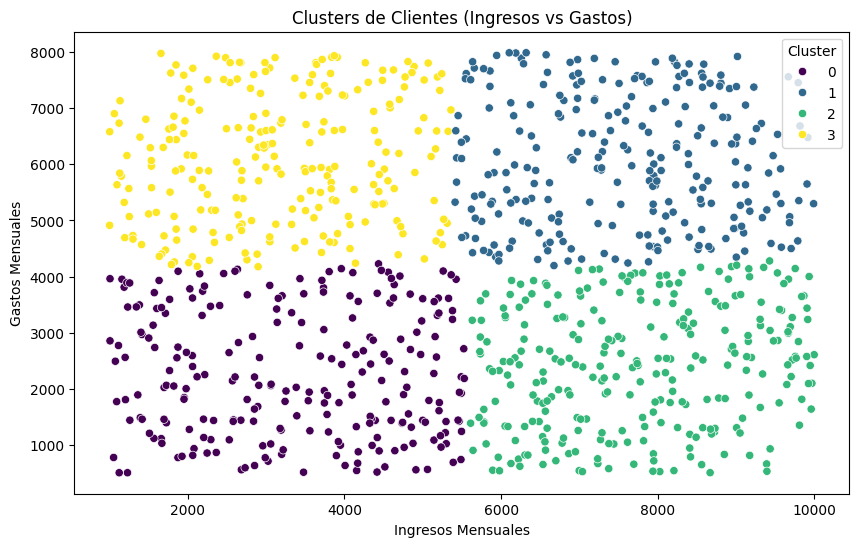

In [26]:
# Seleccionar las características relevantes
features = data[["Income", "Expense"]]
# Normalizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
#creamos los clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
data["Cluster"]  = kmeans.fit_predict(features_scaled)
# Visualización de los clusters (usando Ingresos vs Gastos)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Income", y="Expense", hue="Cluster", palette="viridis")
plt.title("Clusters de Clientes (Ingresos vs Gastos)")
plt.xlabel("Ingresos Mensuales")
plt.ylabel("Gastos Mensuales")
plt.show()

## 2. Clientes jóvenes con alta morosidad

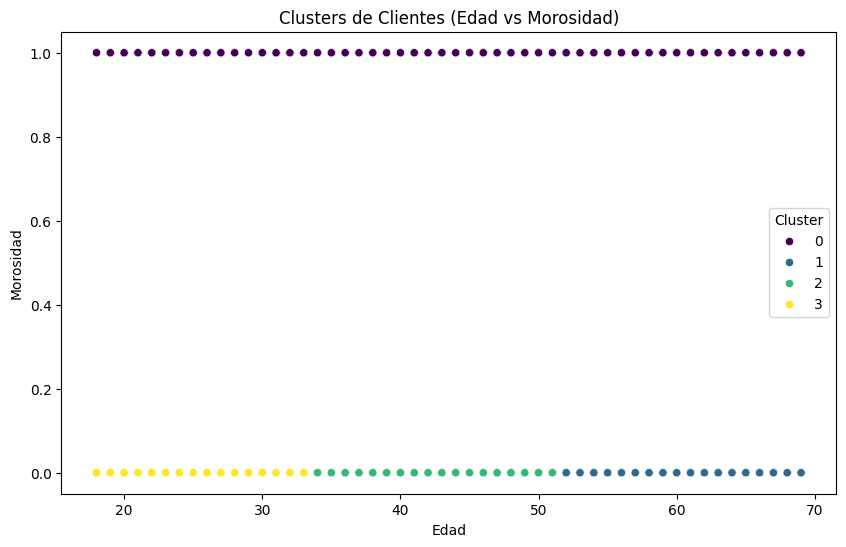

In [27]:
# Seleccionar las características relevantes
features = data[["Age", "Delay"]]
# Normalizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
#creamos los clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
data["Cluster"]  = kmeans.fit_predict(features_scaled)
# Visualización de los clusters (usando Ingresos vs Gastos)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Age", y="Delay", hue="Cluster", palette="viridis")
plt.title("Clusters de Clientes (Edad vs Morosidad)")
plt.xlabel("Edad")
plt.ylabel("Morosidad")
plt.show()

## 3. Clientes mayores con altos ingresos y pocos gastos


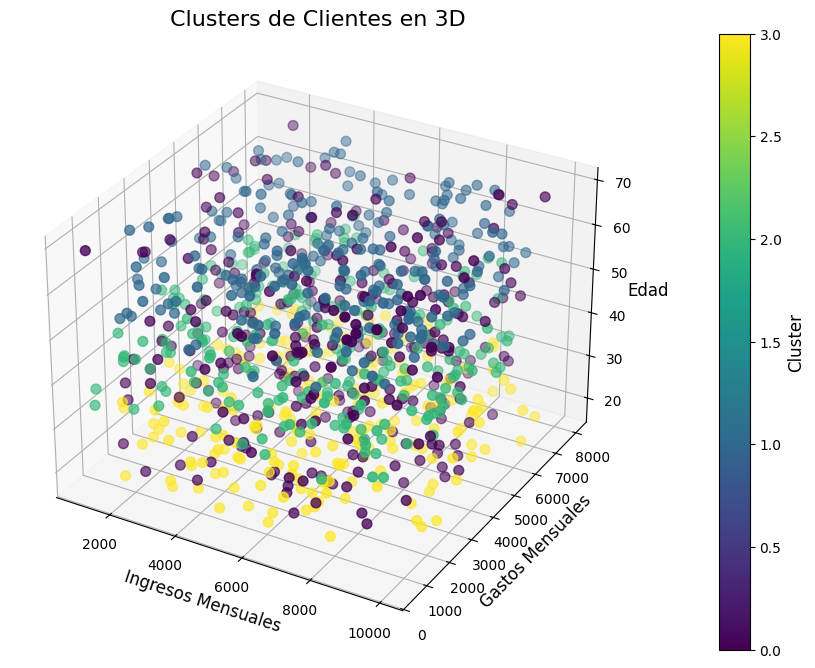

In [28]:
from mpl_toolkits.mplot3d import Axes3D

# Crear figura 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Graficar los puntos en 3D
scatter = ax.scatter(
    data["Income"],
    data["Expense"],
    data["Age"],
    c=data["Cluster"],  # Colorear por cluster
    cmap="viridis",  # Mapa de colores
    s=50,  # Tamaño de los puntos
)

# Etiquetas de los ejes
ax.set_xlabel("Ingresos Mensuales", fontsize=12)
ax.set_ylabel("Gastos Mensuales", fontsize=12)
ax.set_zlabel("Edad", fontsize=12)
ax.set_title("Clusters de Clientes en 3D", fontsize=16)

# Barra de colores para identificar los clusters
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label("Cluster", fontsize=12)

plt.show()

Emitir conclusiones